# Normal Distribution

## Toy Example

Let’s look at a toy example of Normal Distribution. 
Assume we have a dataset containing data on the height of populations in a city, whose frequency histogram is in the following figure.

[Data Source](https://gist.github.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb)

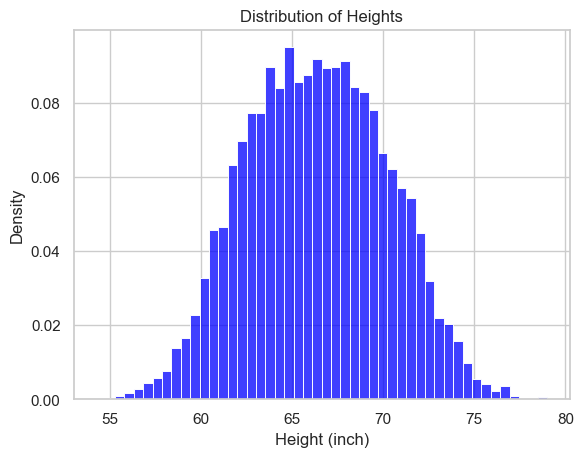

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./data/Weight-Height/weight-height.csv")
df.head()

data = df["Height"]

sns.set(style='whitegrid', palette='pastel')
# Create the histogram of the sampled data with a fit line
ax = sns.histplot(data, kde=False, color="blue", bins="auto", stat="density", label="Histogram")
ax.set(xlabel="Height (inch)", ylabel="Density", title="Distribution of Heights")

plt.show()

As part of our modeling approach, we hypothesize that the actual distribution of this height data follows a Normal Distribution characterized by two parameters: a mean $\mu$ and a standard deviation $\sigma$. Our next step is to determine the optimal values for $\mu$ and $\sigma$ that best align the normal distribution with the existing height data, as depicted by the red curve in the figure below.

```{margin}
$$
\mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$
```

$$p(x) = \mathcal{N}(x; \mu, \sigma)$$

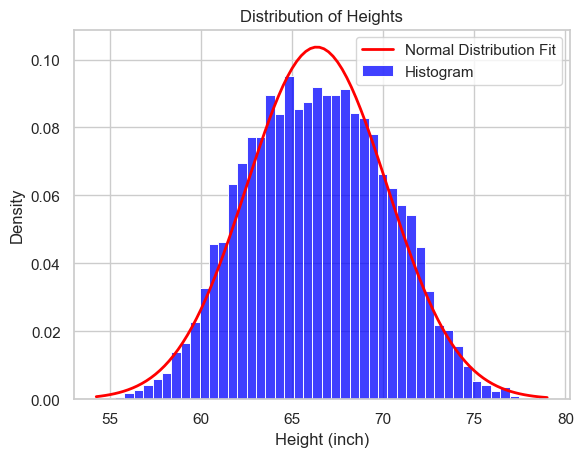

In [5]:
from scipy.stats import norm

# Create the histogram of the sampled data with a fit line
ax = sns.histplot(data, kde=False, color="blue", bins="auto", stat="density", label="Histogram")
ax.set(xlabel="Height (inch)", ylabel="Density", title="Distribution of Heights")

# Calculate the mean and standard deviation for the normal distribution fit
mu = np.mean(data)
sigma = np.std(data)

# Generate points on the x axis:
x = np.linspace(min(data), max(data), 100)

# Plot the normal distribution curve
plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2, label="Normal Distribution Fit")

# Add a legend
plt.legend()

# Show the plot
plt.show()


We will introduce the parameter estimation method later, but now, let’s assume that we have obtained the estimated distribution as the red curve in the figure. 
From this distribution, we can generate new (pseudo) data that look similar to the original ones by sampling.

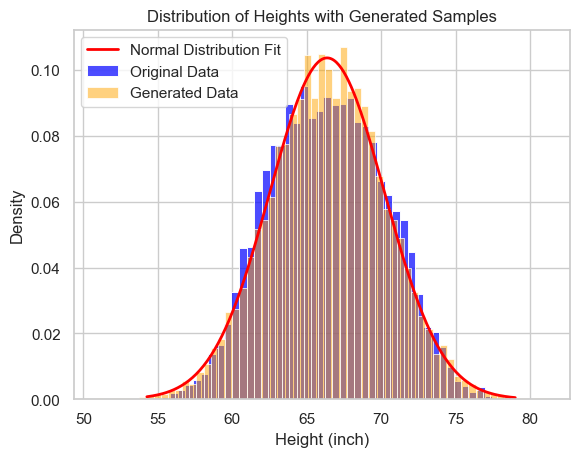

In [6]:
# Generate samples from the fitted normal distribution
samples = np.random.normal(mu, sigma, len(data))

# Create the histogram of the sampled data
ax = sns.histplot(data, bins="auto", stat="density", color="blue", alpha=0.7, label='Original Data')
sns.histplot(samples, bins="auto", stat="density", color="orange", alpha=0.5, label='Generated Data')

# Generate points on the x axis
x = np.linspace(data.min(), data.max(), 300)

# Plot the normal distribution curve
plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2, label="Normal Distribution Fit")

# Setting labels and title
ax.set(xlabel="Height (inch)", ylabel="Density", title="Distribution of Heights with Generated Samples")
plt.legend()

plt.show()

## **Maximum Likelihood Estimation**

A method to estimate the distribution (model) parameters is **Maximum Likelihood Estimation (MLE)**. 
This method aims to find the parameters that make the model fit the best to the existing samples we have in hand.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# normal distribution
def normal_pdf(x, mean, cov):
    return (1. / np.sqrt(2 * np.pi * cov)) * np.exp(-((x - mean) ** 2) / (2 * cov))

# Generate dummy data
np.random.seed(0)
data = np.random.normal(5, 2, 500)

# Plotting setup
fig, ax = plt.subplots()
x = np.linspace(data.min()-1, data.max()+1, 1000)

# Candidates
mu_list = [3, 4.2, 5.5, 6, 7, 4, 5, 3.3, 4.4, 5.9, 6.1, 7.3, 4.6, 5.1]
sigma_list = [4.5, 2.5, 6.1, 2.5, 3.5, 5.0, 4.3, 4.5, 2.5, 6.1, 2.5, 3.5, 5.0, 4.3]

def update(frame):
    mu, sigma = mu_list[frame], sigma_list[frame]
    y = normal_pdf(x, mu, sigma)
    # Clear the plot and replot the data histogram
    ax.clear()
    sns.histplot(data.ravel(), bins=30, kde=False, color="gray", ax=ax, stat='density')
    ax.plot(x, y, label=f"mu={mu}, sigma={sigma}")
    
    ax.set_xlim(-1, 11)
    ax.set_ylim(0, 0.3)
    ax.legend()

ani = FuncAnimation(fig, update, frames=len(mu_list), repeat=False)
plt.close(fig)  # Prevent display of static plot

# Render the animation as HTML
html_str = ani.to_jshtml()
display(HTML(html_str))

Assume that we have $N$ samples of the observed data $\mathcal{D}=\{x^{(1)}, x^{(2)}, ..., x^{(N)}\}$. 
Considering the assumption that each sample is independently sampled from the distribution $p(x;\theta)$, where $\theta$ is the model's parameters. 
We can express the probability density of the sample set $\mathcal{D}$ as follows.

$$p(\mathcal{D};\theta) = \prod_{n=1}^{N}{p(x^{(n)};\theta)}$$

We can consider this probability density as a function of $\theta$ as the following. 
This $L(\theta)$ is called the Likelihood or Likelihood Function.

$$L(\theta) = p(\mathcal{D};\theta) $$

In MLE, we aim to find $\theta = \hat{\theta}$ that maximizes the likelihood function $L(\theta)$. However, in most applications, we usually use the Log-Likelihood Function instead of directly maximizing the likelihood function, as its calculation is much more convenient. The parameters obtained with the maximizing likelihood function and log-likelihood function are equivalent to the $\log$ function, which is a monotonically increasing function.

$$\begin{align*}
\log{L(\theta)} &= \log{p(\mathcal{D};\theta)}\\
&=\log{\prod_{n=1}^{N}{p(x^{(n)};\theta)}} \\
&= \sum_{n=1}^{N}{\log{p(x^{(n)};\theta)}}
\end{align*}$$

Thus, the model parameters can be obtained as follows.

$$\hat{\theta} = \arg\max_\theta \log L(\theta)$$

```{admonition} Parameter Estimation for Normal Distribution
The log-likelihood function of the normal distribution function can be obtained as follows.

$$\begin{align*}
L(\mu,\sigma) &= \sum_{n=1}^N\log \mathcal{N}(x^{(n)};\mu,\sigma) \\
&= \sum_{n=1}^N\log \left[\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x^{(n)}-\mu)}{2\sigma^2}\right)\right] \\
&= -\frac{N}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{n=1}^N\left(x^{(n)}-\mu\right)^2
\end{align*}$$

$L(\mu,\sigma)$ takes the maximum value when $\frac{\partial L}{\partial \mu} = 0, \frac{\partial L}{\partial \sigma} = 0 $. Analytically solving these equations, we can obtain the parameter $\hat{\mu}, \hat{\sigma}$ as follows.

$$\begin{align*}
\hat{\mu} &= \frac{1}{N}\sum_{n=1}^Nx^{(n)} \\ \hat{\sigma}&=\sqrt{\frac{1}{N}\sum_{n=1}^N\left(x^{(n)}-\hat\mu\right)^2}
\end{align*}$$
```

### 